### Required Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

### Dataset

In [10]:
# dataset path
datasetPath = './DataSets/Customer-Churn-Records.csv'

# calling the dataset
df = pd.read_csv(datasetPath)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
# checking the dimension of the dataset
df.shape

(10000, 18)

In [12]:
# removing the row number, CustomerId and Surname columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Checking for the missing values

In [13]:
# checking for the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [14]:
# checking for the unique values
for col in df.columns:
    print(f'{col}: ({df[col].dtype}) {df[col].nunique()} unique values')

CreditScore: (int64) 460 unique values
Geography: (object) 3 unique values
Gender: (object) 2 unique values
Age: (int64) 70 unique values
Tenure: (int64) 11 unique values
Balance: (float64) 6382 unique values
NumOfProducts: (int64) 4 unique values
HasCrCard: (int64) 2 unique values
IsActiveMember: (int64) 2 unique values
EstimatedSalary: (float64) 9999 unique values
Exited: (int64) 2 unique values
Complain: (int64) 2 unique values
Satisfaction Score: (int64) 5 unique values
Card Type: (object) 4 unique values
Point Earned: (int64) 785 unique values


In [15]:
# catergorical columns
cat_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type']

# numerical columns
num_col = [x for x in df.columns if x not in cat_col]

### Data Exploration

In [16]:
# frequency distribution of the response variable
df["Exited"].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [17]:
df["Exited"].value_counts()/df["Exited"].value_counts().sum()

Exited
0    0.7962
1    0.2038
Name: count, dtype: float64

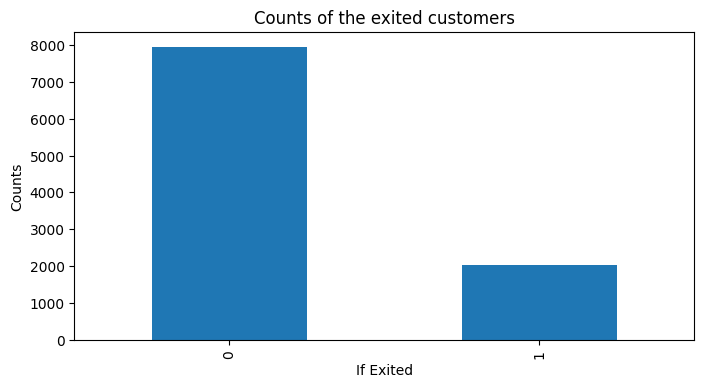

In [18]:
# representation of the frequency distribution of the response variable
fig, ax = plt.subplots(figsize=(8,4))
df["Exited"].value_counts().plot.bar(ax=ax)
ax.set_title("Counts of the exited customers")
ax.set_xlabel("If Exited")
ax.set_ylabel("Counts")

'''Comment: Imbalance in the dataset with respect to the response variable'''

plt.savefig('./plots/freqOfExited.jpg')

In [19]:
# function for plotting the exited variable according to other categorical variables
def plot_exited_according_to(colName):
    '''This function creates a plot of the count of Exited variable according to mentioned variable'''
    fig, ax = plt.subplots(figsize=(8,4))

    # group data and total count
    groupedData = df.groupby([colName, "Exited"]).size().unstack()
    totalCount = groupedData.sum(axis=1)

    # normalised data to get the proportion
    normalisedData = groupedData.div(totalCount, axis=0)
    
    # plot
    normalisedData.plot.bar(stacked=True, ax=ax)
    ax.set_title(f"Churned Customer according to {colName}")
    ax.set_xlabel(colName)
    ax.set_ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    return fig

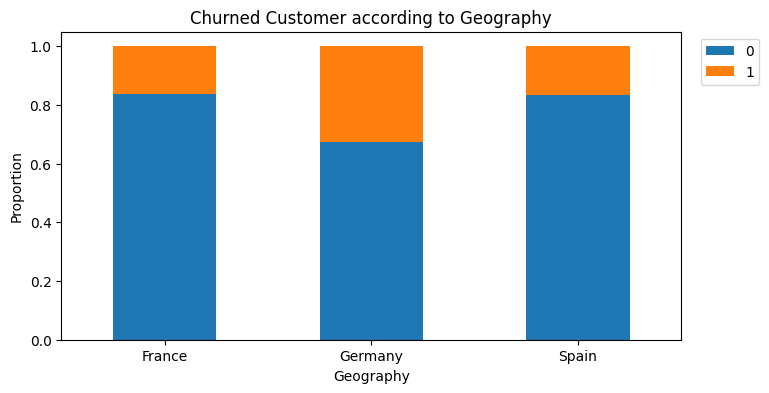

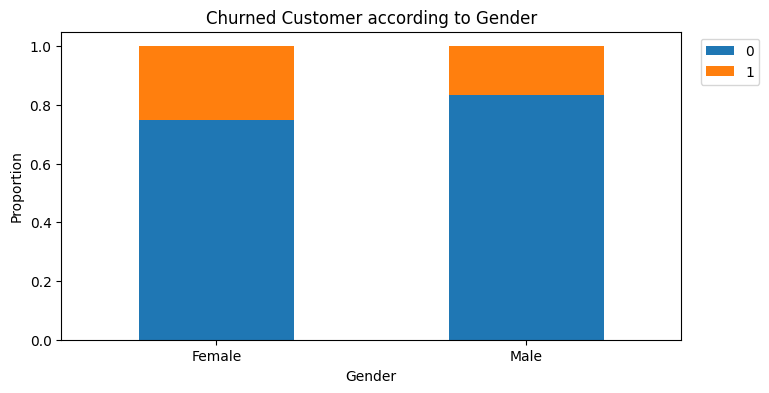

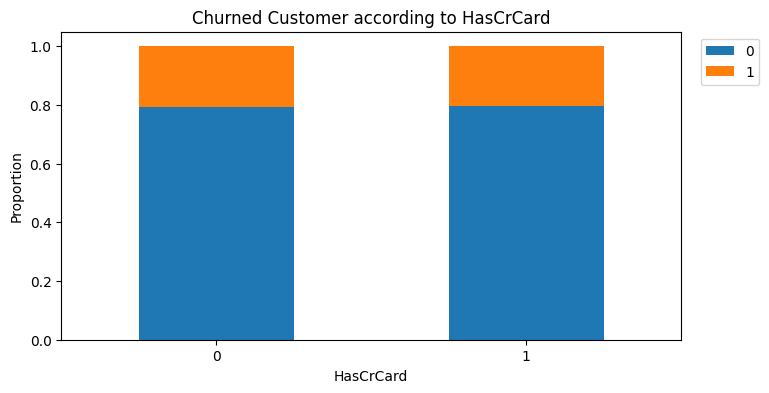

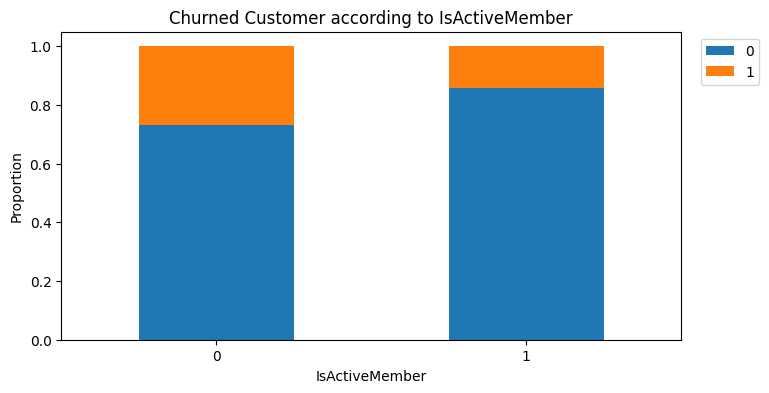

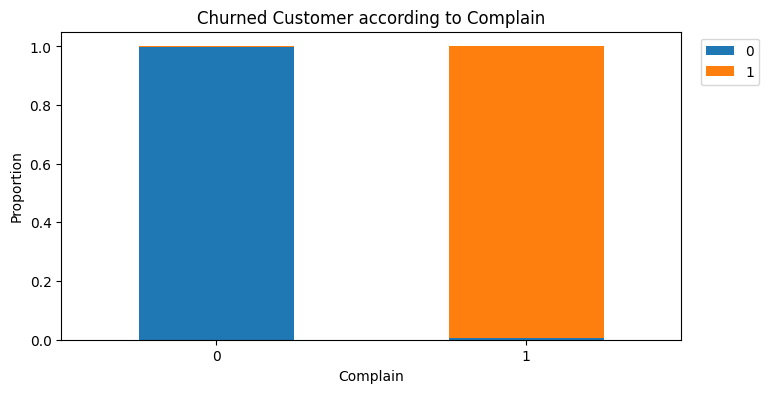

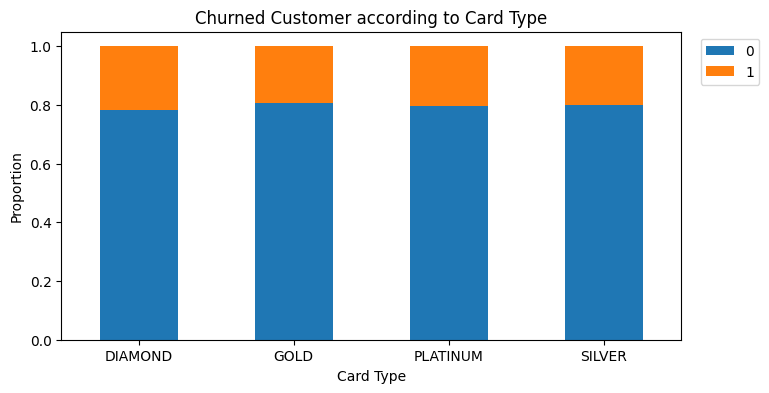

In [20]:
# preparing plots for the categorical variables
for col in cat_col:
    if col != "Exited":
        figPlot = plot_exited_according_to(col)
        plt.savefig(f'./plots/exitedAccTo{col}.jpg')

In [21]:
# function for plotting the numerical variablbes according to different levels of the exited variable
def according_to_exit_plot(colName):
    '''function to plot the given numerical variables with respect to the levels of response'''
    fig, ax = plt.subplots(figsize=(8,4)) 
    
    df[[colName, 'Exited']].plot.box(by="Exited", ax=ax, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel("Exited")
    ax.set_ylabel(colName)

    return fig

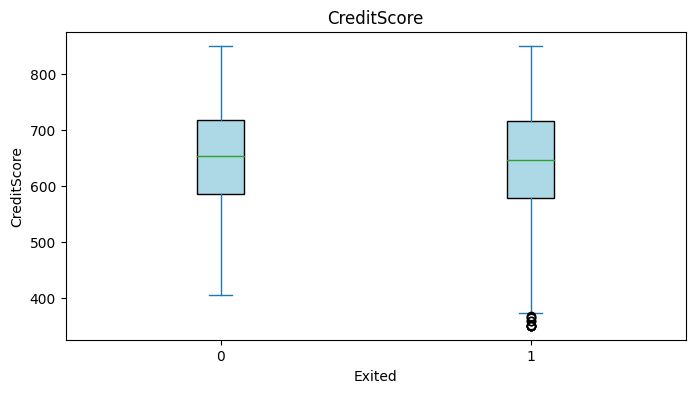

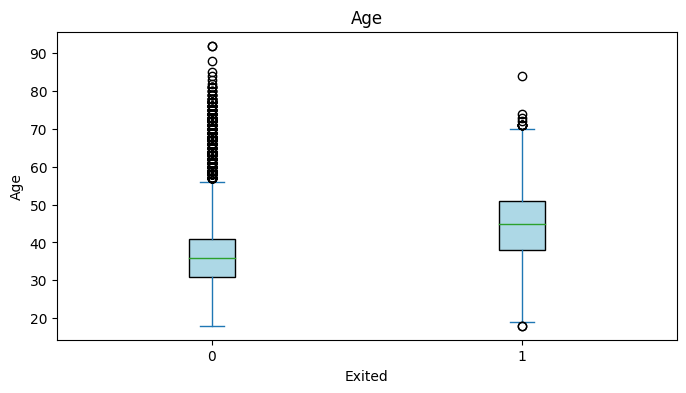

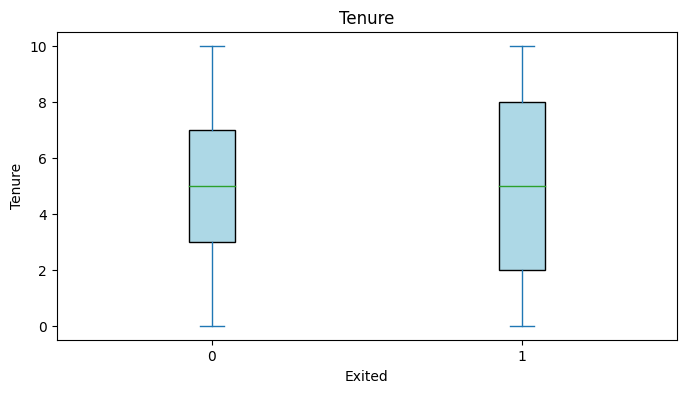

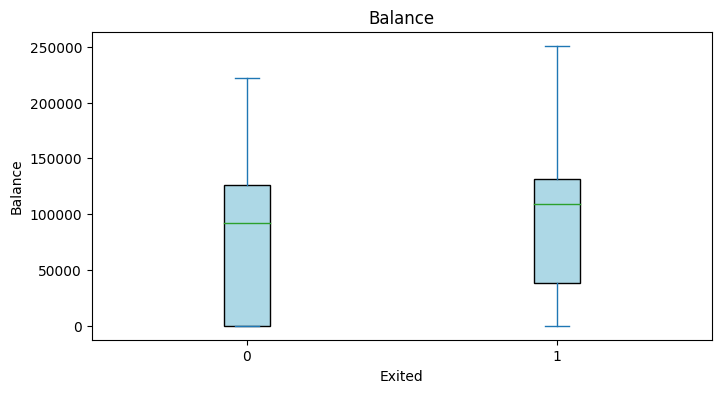

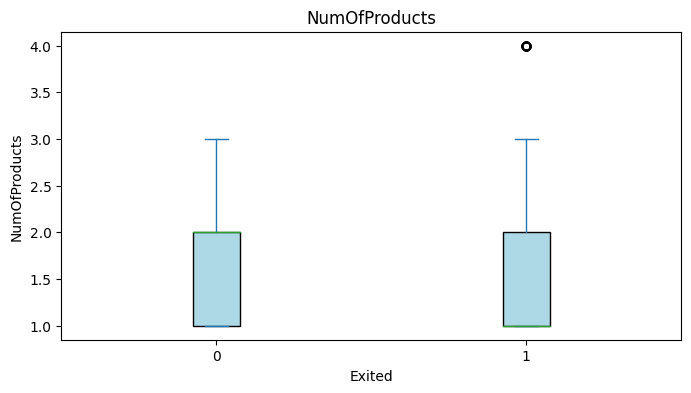

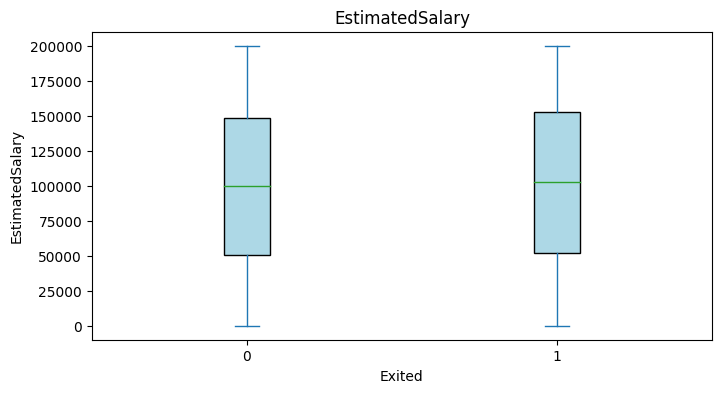

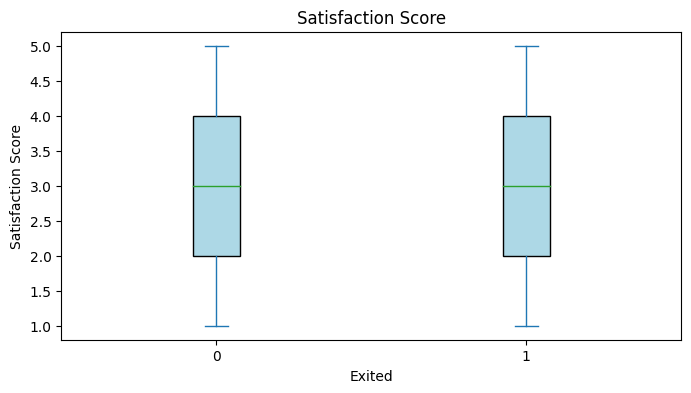

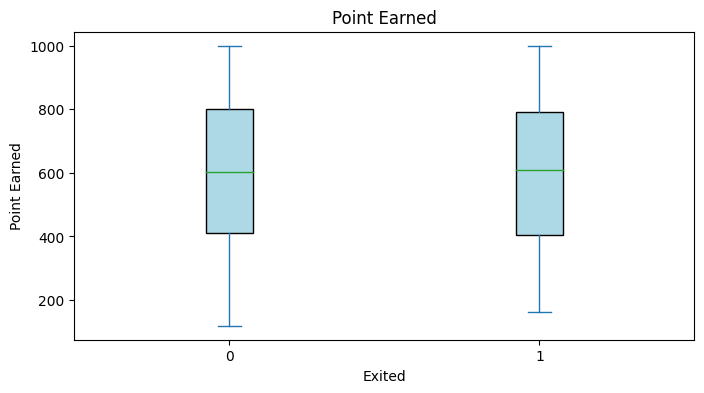

In [22]:
for col in num_col:
    figPlot = according_to_exit_plot(col)
    plt.savefig(f'./plots/accToExit{col}.jpg')

### Detection of the outliers in the dataset

In [23]:
# scaling the numerical columns
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(df[num_col]), columns=num_col)
scaled_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,-0.721130,-0.630839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-0.009816,-0.666251
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,-0.009816,-1.015942
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,1.412812,-1.135457
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1.412812,-0.803472


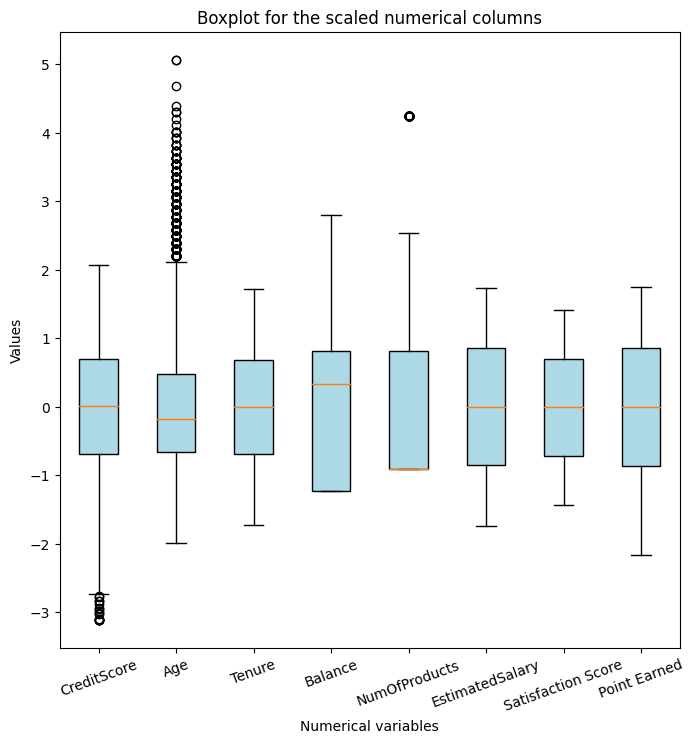

In [24]:
# boxplot plot of the  scaled numerical columns
fig, ax = plt.subplots(figsize=(8,8))
bxplt = plt.boxplot(scaled_num, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot for the scaled numerical columns")
plt.ylabel("Values")
plt.xlabel("Numerical variables")
plt.xticks(list(range(1, 9)), num_col, rotation=20)

plt.savefig('./plots/outliers.png')

In [25]:
# function to remove outliers
def remove_outliers(dataFrame):
    '''function that detects and removes outliers from the dataset'''
    outlierId = []
    for col in dataFrame.columns:
        quar = list(dataFrame[col].quantile([0.25, 0.75]))
        iqr = np.sum(np.array([-1, 1])*np.array(quar))
        
        whis = 1.5
        bnd = quar+whis*iqr*np.array([-1,1])
        outlierId = outlierId + list(dataFrame[(dataFrame[col]>bnd[1]) | (dataFrame[col]<bnd[0])].index)

    outlierId = list(set(outlierId))
    return dataFrame.drop(outlierId, axis=0)

([<matplotlib.axis.XTick at 0x1e07ae1b150>,
 [Text(1, 0, 'CreditScore'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Tenure'),
  Text(4, 0, 'Balance'),
  Text(5, 0, 'NumOfProducts'),
  Text(6, 0, 'EstimatedSalary'),
  Text(7, 0, 'Satisfaction Score'),
  Text(8, 0, 'Point Earned')])

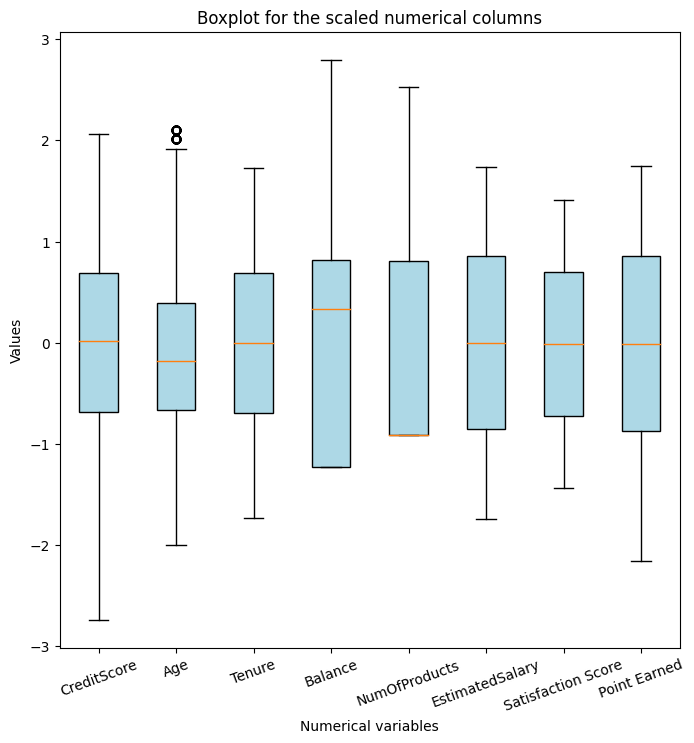

In [26]:
# boxplot after removing outliers
fig, ax = plt.subplots(figsize=(8,8))
bxplt = plt.boxplot(remove_outliers(scaled_num), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot for the scaled numerical columns")
plt.ylabel("Values")
plt.xlabel("Numerical variables")
plt.xticks(list(range(1, 9)), num_col, rotation=20)

### Encoding the categorical columns

In [27]:
# finding the unique values for the columns
baseValueDict = {}
for col in cat_col:
    print(f"{col} : {df[col].unique()}")
    baseValueDict[col] = list(df[col].unique())[0]

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']
HasCrCard : [1 0]
IsActiveMember : [1 0]
Exited : [1 0]
Complain : [1 0]
Card Type : ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [28]:
encoder = OneHotEncoder(drop="first")
encoder.fit(df[cat_col])
encoded = encoder.transform(df[cat_col]).toarray()

In [30]:
# function for the one hot encoding
def oneHotEncode(dataFrame, encoder):
    '''function that converts the categorical columns into one hot encoded value'''

    # encoded definition
    encoded = encoder.transform(dataFrame).toarray()
    
    # preparing the column names
    all_cat = encoder.categories_
    cols = dataFrame.columns
    categories = []
    for i in range(len(cols)):
        categories = categories + [f'{cols[i]}_{x}' for x in list(all_cat[i])[1:]]
    
    encoded = pd.DataFrame(encoded, columns=categories)
    return encoded

In [31]:
oneHotEncode(df[cat_col], encoder).head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited_1,Complain_1,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
